# Auto-Encoder

Similarly to PCA:

$$\large h = W_e(x-\mu) = W_ex + b_e$$

In this case the weights in $W_e$ and $b_e$ are trained by backprop.

Moreover the reconstruction is:

$$\large \hat{x} = W_dh + b_d$$

<img src="images/ae_base.png" width="350pt"/>

## Deep Auto-Encoder

A deep auto-encoder is a "hourglass"-shaped network:

<img src="images/ae.png" width="550pt"/>

An auto-encoder tries to encode as much information of the data as possible to reconstruct it.

In this example the data are reduced to two components by PCA and an AE:

<img src="images/ae_nlp.png" width="750pt"/>


In [3]:
# Loading the tools:
%run autoencoders.py

print("Creating the net...")
autoencoder, encoder, decoder = create_net(l1_regularization=False)

Creating the net...


Loading the data...


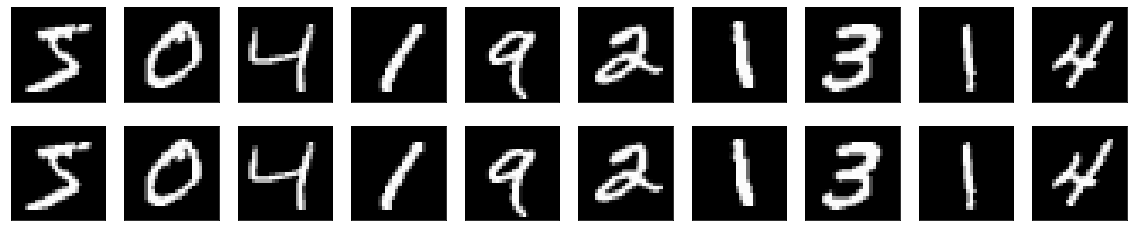

In [4]:
print("Loading the data...")

x_train, y_train, x_test, y_test = load_data()

imshowcompare(x_train, y_train)

In [6]:
from tensorflow.keras.callbacks import TensorBoard

print("Training AutoEncoder...")

train(
    net=autoencoder,
    train_data=(x_train, y_train), 
    validation_data=(x_test, y_test),
    callbacks=[TensorBoard(log_dir='generated/AE')]
)


Training AutoEncoder...
Epoch 1/30
938/938 [==============================] - 51s 54ms/step - loss: 0.1180 - val_loss: 0.1129
Epoch 2/30
938/938 [==============================] - 52s 56ms/step - loss: 0.1112 - val_loss: 0.1094
Epoch 3/30
938/938 [==============================] - 50s 53ms/step - loss: 0.1071 - val_loss: 0.1042
Epoch 4/30
938/938 [==============================] - 48s 51ms/step - loss: 0.1043 - val_loss: 0.1019
Epoch 5/30
938/938 [==============================] - 52s 56ms/step - loss: 0.1022 - val_loss: 0.1002
Epoch 6/30
938/938 [==============================] - 50s 53ms/step - loss: 0.1004 - val_loss: 0.0982
Epoch 7/30
938/938 [==============================] - 50s 53ms/step - loss: 0.0989 - val_loss: 0.0981
Epoch 8/30
938/938 [==============================] - 50s 53ms/step - loss: 0.0977 - val_loss: 0.0959
Epoch 9/30
938/938 [==============================] - 49s 52ms/step - loss: 0.0968 - val_loss: 0.0955
Epoch 10/30
938/938 [==============================] - 51s

In [8]:
# Saving the models separatedly and together:
autoencoder.save('generated/ae_autoencoder')
encoder.save('generated/ae_encoder')
decoder.save('generated/ae_decoder')

INFO:tensorflow:Assets written to: generated/ae_autoencoder/assets
INFO:tensorflow:Assets written to: generated/ae_encoder/assets
INFO:tensorflow:Assets written to: generated/ae_decoder/assets


In [14]:
from tensorflow.keras.models import load_model

# Loading the models back:
autoencoder = load_model('generated/ae_autoencoder')
encoder = load_model('generated/ae_encoder')
decoder = load_model('generated/ae_decoder')

Using the encoder/decoder pair to compress/reconstruct...


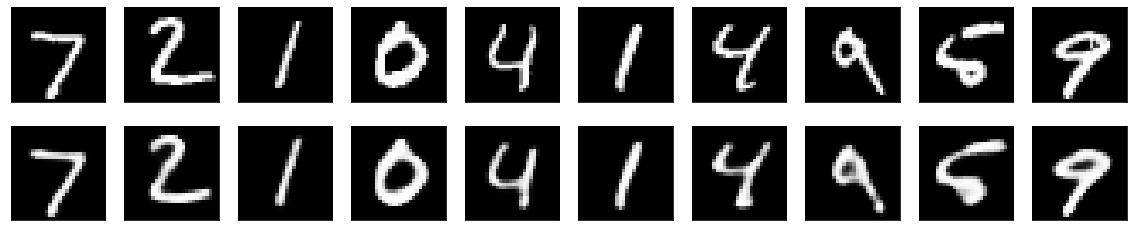

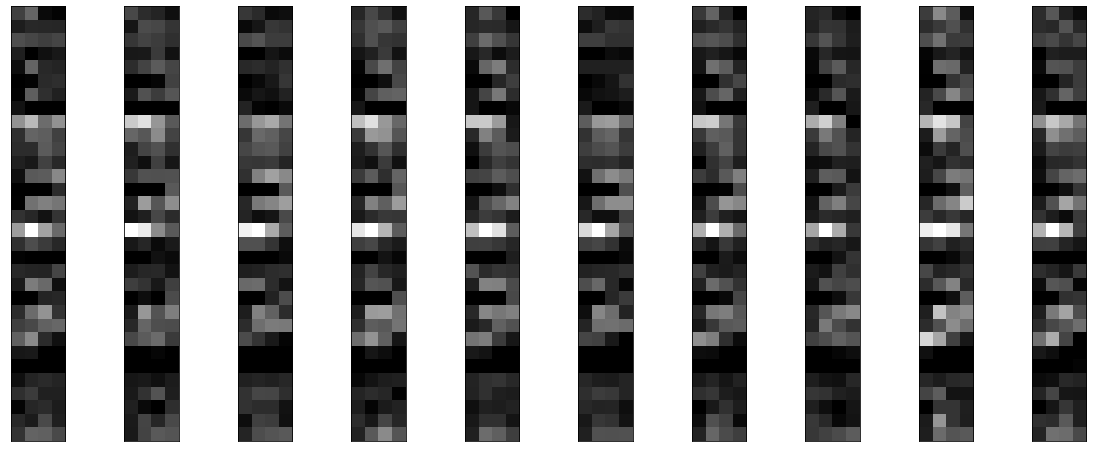

In [13]:
print("Using the encoder/decoder pair to compress/reconstruct...")

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

imshowcompare(x_test, decoded_imgs)

plotfeatures(encoded_imgs)

## Undercomplete

Undercomplete autoencoders are forced to represent data in a more concise way:

$$\large p(v) = \sum_h p(v|h)p(h)$$

where

$$\large |h| \ll |v|$$

## Overcomplete

Overcomplete autoencoders __fail__ to represent the data as latent variables.

The hidden layer __copies__ the data learning the identity function.

Something more must be added to force the encoder to learn the data distribution.

## Generating data

The decoder can be used as a generator network, we need to know the $h$ distribution though:

Shape of coefficients: (4, 4, 8)


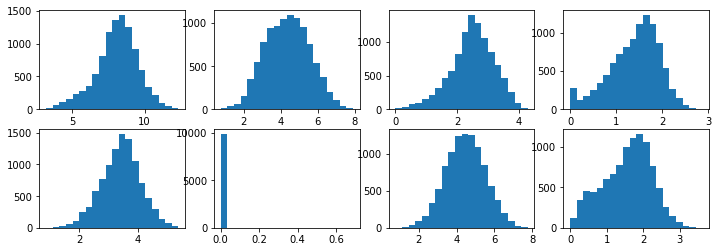

In [27]:
from matplotlib import pyplot as plt

print(f"Shape of coefficients: {encoded_imgs.shape[1:]}")
fig, ax = plt.subplots(2, 4, figsize=(12,4))
for i in range(8):
    ax[i//4,i%4].hist(encoded_imgs[:,1,1,i].squeeze(),20)
plt.show()